# <font color='red'>BackPropagation</font>

**There will be some functions that start with the word "grader" ex: grader_sigmoid(), grader_forwardprop(), grader_backprop() etc, you should not change those function definition.<br><br>Every Grader function has to return True.**

## <font color='red'>Loading data </font>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pickle
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt

with open('/content/drive/My Drive/Dataset/Backpropagation/data.pkl', 'rb') as f:
    data = pickle.load(f)
print(data.shape)
X = data[:, :5]
y = data[:, -1]
print(X.shape, y.shape)

(506, 6)
(506, 5) (506,)


In [3]:
print(data.shape)
X = data[:, :5]
y = data[:, -1]
print(X.shape, y.shape)

(506, 6)
(506, 5) (506,)


# <font color='red'>Computational graph</font>

<img src='https://i.imgur.com/seSGbNS.png'>


*  **If you observe the graph, we are having input features [f1, f2, f3, f4, f5] and 9 weights [w1, w2, w3, w4, w5, w6,    w7, w8, w9]**.<br><br>
*  **The final output of this graph is a value L which is computed as (Y-Y')^2** 

# <font color='red'>Task 1: Implementing backpropagation and Gradient checking </font>

<font color='blue'><b>Check this video for better understanding of the computational graphs and back propagation</font>

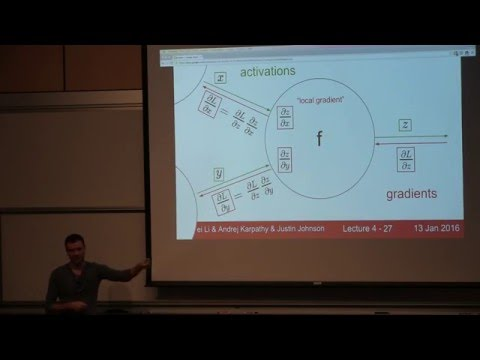

In [ ]:
from IPython.display import YouTubeVideo
YouTubeVideo('i94OvYb6noo',width="1000",height="500")


*  <b>Write two functions<br>
    *  Forward propagation</b>(Write your code in<font color='blue'> def forward_propagation()</b></font>)<br><br>
    For easy debugging, we will break the computational graph into 3 parts.

    <font color='green'><b>Part 1</b></font></b>
    <img src='https://i.imgur.com/0xUaxy6.png'><br><br>
    <font color='green'><b>Part 2</b></font></b><br>
    <img src='https://i.imgur.com/J29pAJL.png'><br><br>
    <font color='green'><b>Part 3</b></font></b>
    <img src='https://i.imgur.com/vMyCsd9.png'>

    <pre>
    <font color='green'>
def forward_propagation(X, y, W):
        <font color='grey'>
        # X: input data point, note that in this assignment you are having 5-d data points
        # y: output varible
        # W: weight array, its of length 9, W[0] corresponds to w1 in graph, W[1] corresponds to w2 in graph, <br>         ..., W[8] corresponds to w9 in graph.  
        # you have to return the following variables
        # exp= part1 (compute the forward propagation until exp and then store the values in exp)
        # tanh =part2(compute the forward propagation until tanh and then store the values in tanh)
        # sig = part3(compute the forward propagation until sigmoid and then store the values in sig)
        # now compute remaining values from computional graph and get y'
        # write code to compute the value of L=(y-y')^2
        # compute derivative of L  w.r.to Y' and store it in dl
        # Create a dictionary to store all the intermediate values
        # store L, exp,tanh,sig,dl variables
        </font>
        return (dictionary, which you might need to use for back propagation)
        <font color='grey'>
        </font>
</font>
</pre>
    *  <b>Backward propagation</b>(Write your code in<font color='blue'> def backward_propagation()</b></font>)
    </b>
    <pre>
    <font color='green'>
    def backward_propagation(L, W,dictionary):
        <font color='grey'>
        # L: the loss we calculated for the current point
        # dictionary: the outputs of the forward_propagation() function
        # write code to compute the gradients of each weight [w1,w2,w3,...,w9]
        # Hint: you can use dict type to store the required variables 
        # return dW, dW is a dictionary with gradients of all the weights
        </font>
        return dW
        </font>
</font>
</pre>

 ## <font color='red'>Gradient clipping</font>

<b> Check this  <a href='https://towardsdatascience.com/how-to-debug-a-neural-network-with-gradient-checking-41deec0357a9'>blog link</a> for more details on Gradient clipping

 we know that the derivative of any function is
 
 $$\lim_{\epsilon\to0}\frac{f(x+\epsilon)-f(x-\epsilon)}{2\epsilon}$$


*  The definition above can be used as a numerical approximation of the derivative. Taking an epsilon small enough, the calculated approximation will have an error in the range of epsilon squared. 

*  In other words, if epsilon is 0.001, the approximation will be off by 0.00001.

Therefore, we can use this to approximate the gradient, and in turn make sure that backpropagation is implemented properly. This forms the basis of <b>gradient checking!</b>

## <Font color='blue'>Gradient checking example</font>

<font >
lets understand the concept with a simple example:
$f(w1,w2,x1,x2)=w_{1}^{2} . x_{1} + w_{2} . x_{2}$ 

from the above function , lets assume $w_{1}=1$, $w_{2}=2$, $x_{1}=3$, $x_{2}=4$ the gradient of $f$ w.r.t $w_{1}$ is

\begin{array} {lcl}
\frac{df}{dw_{1}} = dw_{1} &=&2.w_{1}.x_{1} \\& = &2.1.3\\& = &6
\end{array}


let calculate the aproximate gradient of $w_{1}$ as mentinoned in the above formula and considering $\epsilon=0.0001$

\begin{array} {lcl}
dw_1^{approx} & = & \frac{f(w1+\epsilon,w2,x1,x2)-f(w1-\epsilon,w2,x1,x2)}{2\epsilon} \\ & = & \frac{((1+0.0001)^{2} . 3 + 2 . 4) - ((1-0.0001)^{2} . 3 + 2 . 4)}{2\epsilon} \\ & = & \frac{(1.00020001 . 3 + 2 . 4) - (0.99980001. 3 + 2 . 4)}{2*0.0001} \\ & = & \frac{(11.00060003) - (10.99940003)}{0.0002}\\ & = & 5.99999999999
\end{array}

Then, we apply the following formula for gradient check: <i>gradient_check</i> = 
$\frac{\left\Vert\left (dW-dW^{approx}\rm\right) \right\Vert_2}{\left\Vert\left (dW\rm\right) \right\Vert_2+\left\Vert\left (dW^{approx}\rm\right) \right\Vert_2}$

The equation above is basically the Euclidean distance normalized by the sum of the norm of the vectors. We use normalization in case that one of the vectors is very small.
As a value for epsilon, we usually opt for 1e-7. Therefore, if gradient check return a value less than 1e-7, then it means that backpropagation was implemented correctly. Otherwise, there is potentially a mistake in your implementation. If the value exceeds 1e-3, then you are sure that the code is not correct.

in our example: <i>gradient_check</i> $ = \frac{(6 - 5.999999999994898)}{(6 + 5.999999999994898)} = 4.2514140356330737e^{-13}$

you can mathamatically derive the same thing like this

\begin{array} {lcl}
dw_1^{approx} & = & \frac{f(w1+\epsilon,w2,x1,x2)-f(w1-\epsilon,w2,x1,x2)}{2\epsilon} \\ & = & \frac{((w_{1}+\epsilon)^{2} . x_{1} + w_{2} . x_{2}) - ((w_{1}-\epsilon)^{2} . x_{1} + w_{2} . x_{2})}{2\epsilon} \\ & = & \frac{4. \epsilon.w_{1}. x_{1}}{2\epsilon} \\ & = &  2.w_{1}.x_{1}
\end{array}


## <font color='red'> Implement Gradient checking </font> <br>
 (Write your code in <font color='blue'> def gradient_checking()</font>)

**Algorithm** 



<pre>
<font color='darkblue'>
W = initilize_randomly
def gradient_checking(data_point, W):<font color='grey'>
    # compute the L value using forward_propagation()
    # compute the gradients of W using backword_propagation()</font>
    approx_gradients = []
    for each wi weight value in W:<font color='grey'>
        # add a small value to weight wi, and then find the values of L with the updated weights
        # subtract a small value to weight wi, and then find the values of L with the updated weights
        # compute the approximation gradients of weight wi</font>
        approx_gradients.append(approximation gradients of weight wi)<font color='grey'>
    # compare the gradient of weights W from backword_propagation() with the aproximation gradients of weights with <br>  gradient_check formula</font>
    return gradient_check</font>
<b>NOTE: you can do sanity check by checking all the return values of gradient_checking(),<br> they have to be zero. if not you have bug in your code
</pre></b>

# <font color='red'> Task 2 : Optimizers </font>

* As a part of this task, you will be implementing 3 type of optimizers(methods to update weight)
* Use the same computational graph that was mentioned above to do this task
* Initilze the 9 weights from normal distribution with mean=0 and std=0.01

**Check below video and <a href='https://cs231n.github.io/neural-networks-3/'>this</a> blog**

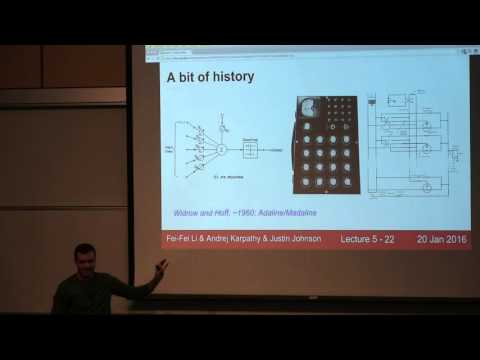

In [ ]:
from IPython.display import YouTubeVideo
YouTubeVideo('gYpoJMlgyXA',width="1000",height="500")

<font color='blue'><b>Algorithm</b>

<pre>
    for each epoch(1-100):
        for each data point in your data:
            using the functions forward_propagation() and backword_propagation() compute the gradients of weights
            update the weigts with help of gradients  ex: w1 = w1-learning_rate*dw1
</pre>

## <font color='red'> Implement below tasks</b>


*  <b>Task 2.1</b>: you will be implementing the above algorithm with <b>Vanilla update</b> of weights<br><br>
*  <b>Task 2.2</b>: you will be implementing the above algorithm with <b>Momentum update</b> of weights<br><br>
*  <b>Task 2.3</b>: you will be implementing the above algorithm with <b>Adam update</b> of weights


**Note : If you get any assertion error while running grader functions, please print the variables in grader functions and check which variable is returning False .Recheck your logic for that variable .**

<br>
<br>
<br>

# <font color='red'>Task 1 </font>

## <font color='blue'>Forward propagation </font>

In [4]:
def sigmoid(z):

  #Calculate sigmoid
  return (1/(1+np.exp(-z)))
    
def forward_propagation(x, y, w):

  #Create empty dictionary
  d = dict()

  #Calculate exponential using formula
  exp = np.exp(((w[0]**2 * x[0]**2) + (w[1]**2 * x[1]**2) + (2*w[0]*x[0]*w[1]*x[1])) + w[5])

  #calculate tanh using formula
  tanh = np.tanh(exp + w[6])

  #calculate sigmoid value by calling sigmoid function
  sig = sigmoid(((np.sin(w[2]*x[2])) * ((w[3]*x[3]) + (w[4]*x[4]))) + w[7])

  #calculate y_hat
  y_hat = tanh + (sig*w[8])

  #calculate loss value using formula
  loss = (y - y_hat)**2

  #calculte y_predicted value using formula
  dy_pr = -2 * (y - y_hat)

  #Store the calculated values in dictionary
  d['exp'] = exp
  d['tanh'] = tanh
  d['sigmoid'] = sig
  d['loss'] = loss
  d['dy_pr'] = dy_pr
  d['x1'] = x[0]
  d['x2'] = x[1]
  d['x3'] = x[2]
  d['x4'] = x[3]
  d['x5'] = x[4]
  d['y'] = y
  d['y_hat'] = y_hat
  
  #return dictionary
  return d

<font color='cyan'>Grader function - 1</font>

In [ ]:
def grader_sigmoid(z):
  val=sigmoid(z)
  assert(val==0.8807970779778823)
  return True
grader_sigmoid(2)

True

<font color='cyan'>Grader function - 2 </font>

In [ ]:
def grader_forwardprop(data):
    dl = (data['dy_pr']==-1.9285278284819143)
    loss=(data['loss']==0.9298048963072919)
    part1=(data['exp']==1.1272967040973583)
    part2=(data['tanh']==0.8417934192562146)
    part3=(data['sigmoid']==0.5279179387419721)
    assert(dl and loss and part1 and part2 and part3)
    return True
w=np.ones(9)*0.1
d1=forward_propagation(X[0],y[0],w)
grader_forwardprop(d1)

True

## <font color='blue'>Backward propagation</font>

In [14]:
def backward_propagation(L,W,d1):

  #creating empty dictionary
  dw = dict()
  w = W

  #Calculate derivatives of each weights
  dw1 = d1['dy_pr'] * (1-(d1['tanh'])**2) * (d1['exp']) * (2*(w[0]*L[0] + w[1]*L[1]))*L[0]

  dw2 = d1['dy_pr'] * (1-(d1['tanh'])**2) * (d1['exp']) * (2*(w[0]*L[0] + w[1]*L[1]))*L[1]

  dw3 = ( ( (d1['sigmoid'] * (1-d1['sigmoid'])) * w[8] ) * ( np.cos(w[2]*L[2]) * L[2] * ( (w[3]*L[3]) + (w[4]*L[4]) ) ) ) * d1['dy_pr']
  
  dw4 = ( (d1['sigmoid'] * (1-d1['sigmoid'])) * w[8] ) * ( np.sin(w[2]*L[2]) * L[3]) * d1['dy_pr']

  dw5 = ( (d1['sigmoid'] * (1-d1['sigmoid'])) * w[8] ) * ( np.sin(w[2]*L[2]) * L[4]) * d1['dy_pr']

  dw6 = (1-d1['tanh']**2) * d1['dy_pr'] * d1['exp']

  dw7 = (1-d1['tanh']**2) * d1['dy_pr']

  dw8 = ( (d1['sigmoid'] * (1-d1['sigmoid'])) * w[8] ) * d1['dy_pr']

  dw9 = d1['sigmoid'] * d1['dy_pr']

  #Store the above calculated derivaties in dictionary
  dw['dw1'] = dw1
  dw['dw2'] = dw2
  dw['dw3'] = dw3
  dw['dw4'] = dw4
  dw['dw5'] = dw5
  dw['dw6'] = dw6
  dw['dw7'] = dw7
  dw['dw8'] = dw8
  dw['dw9'] = dw9

  #return dictionary
  return dw

<font color='cyan'>Grader function - 3 </font>

In [ ]:
def grader_backprop(data):
    dw1=(data['dw1']==-0.22973323498702003)
    dw2=(data['dw2']==-0.021407614717752925)
    dw3=(data['dw3']==-0.005625405580266319)
    dw4=(data['dw4']==-0.004657941222712423)
    dw5=(data['dw5']==-0.0010077228498574246)
    dw6=(data['dw6']==-0.6334751873437471)
    dw7=(data['dw7']==-0.561941842854033)
    dw8=(data['dw8']==-0.04806288407316516)
    dw9=(data['dw9']==-1.0181044360187037)
    assert(dw1 and dw2 and dw3 and dw4 and dw5 and dw6 and dw7 and dw8 and dw9)
    return True 

w=np.ones(9)*0.1
d1=forward_propagation(X[0],y[0],w)
d1=backward_propagation(X[0],w,d1)
grader_backprop(d1)

True

## <font color='blue'> Implement gradient checking</font>

In [25]:
#initialize weight with 0.1
W = np.ones(9)*0.1
def gradient_checking(data_point, W):

  #assign X and Y
  X = data_point[:, :5]
  y = data_point[:, -1]

  #calculate forward propagation
  df = forward_propagation(X[0], y[0], W)
  #calculate loss
  L = df['loss']
  
  #calculate back propogation
  db = backward_propagation(X[0],W,df)

  #initialize t to 0.0001
  t = 0.0001
  #create empty list
  Wplus, Wminus = [], []
  approx_gradients = []
  gradient_check = []
  
  #iterate through length of Weight(W)
  for i in range(len(W)):
    #add t to first value of weight and store in Wplus
    Wplus = W.copy()
    Wplus[i] = Wplus[i] + t

    #subtract t to first value of weight and store in Wplus
    Wminus = W.copy()
    Wminus[i] = Wminus[i] - t

    #calculate forward propagation
    df = forward_propagation(X[0], y[0], W)
    #calculate back propogation
    db = backward_propagation(X[0],W,df)

    #calculate forward propagation using Wplus
    dfplus = forward_propagation(X[0], y[0], Wplus)
    #calculate forward propagation using Wminus
    dfminus = forward_propagation(X[0], y[0], Wminus)

    #calculate approximate gradient
    dwapp = (dfplus['loss'] - dfminus['loss']) / (2*t)

    #append the calculate gradient to list
    approx_gradients.append(dwapp)

  #iterate through length of weight(W)
  for i in range(1, len(W)+1):
    #calculate gradient heck using formula
    gradient = (np.linalg.norm(db[f'dw{i}'] - approx_gradients[i-1])) / (np.linalg.norm(db[f'dw{i}']) + np.linalg.norm(approx_gradients[i-1]))
    #appending the calculated gradient check to list
    gradient_check.append(gradient)

  for i in range(len(gradient_check)):
    if gradient_check[i] < 1e-7:
      print("True")
    else:
      print('False')

  #return gradient check list
  return gradient_check

In [26]:
g = gradient_checking(data, W)

True
True
True
True
True
True
True
True
True


As we got True in Grdient Checking process, we conclude that all values in gradient_checklist are less than 1e-7.

# <font color='red'>Task 2: Optimizers

###<font color='blue'>Algorithm with Vanilla update of weights</font>

In [30]:
np.random.seed(37)
#get one random number using normal distribution with mena zero and standard deviation 0.01
n = np.random.normal(loc=0, scale=0.01)
#initialize W with random number
W = np.ones(9)*n

In [31]:
#initalize alpha to 0.01
alpha = 0.01
#creating empty lists
loss, loss_v = [], []
#initialize epochs to 100
epochs =100

#iterate through epochs
for i in range(epochs):
  #iterate through length of X
  for j in range(len(X)):
    #calculate forward propogation
    df_v = forward_propagation(X[j], y[j], W)

    #calculate backward propogation
    db_v = backward_propagation(X[j],W,df_v)

    #get backward propogation values and convert it into array and store in dw
    dw = np.array(list(db_v.values()))

    #update W
    W -= alpha * dw

    #calculate forward propogation with updated W
    df_v = forward_propagation(X[j], y[j], W)

  #append loss to list
  loss_v.append(df_v['loss'])

<font color='blue'>Plot between epochs and loss</font>

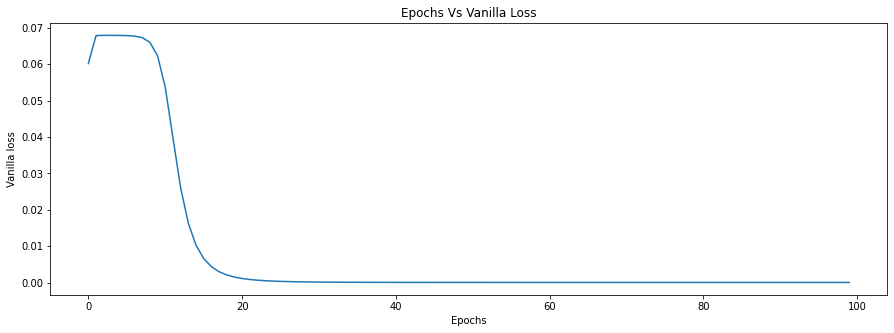

In [32]:
#Ploting Vanilla Loss
plt.figure(figsize=(15,5))
plt.plot(range(epochs), loss_v)
plt.title("Epochs Vs Vanilla Loss")
plt.xlabel('Epochs')
plt.ylabel('Vanilla loss')
plt.show()

###<font color='blue'>Algorithm with Momentum update of weights</font>

In [34]:
#initalize W with random number
W = np.ones(9)*n
#initalize alpha to 0.01
alpha = 0.01

#create empty lists
loss, loss_m = [], []
#initialize mu, epochs, v
mu = 0.9
epochs =100
v = 0

#iterate through epochs
for i in range(epochs):
  #iterate through length of X
  for j in range(len(X)):
    #calculate forward propogation
    df_m = forward_propagation(X[j], y[j], W)
    #calculate backward propogation
    db_m = backward_propagation(X[j],W,df_m)

    #get backward propogation values and convert it into array and store in dw
    dw = np.array(list(db_m.values()))

    #calculate v using formula
    v = mu * v - alpha * dw
    #update W
    W += v

    #calculate forward propogation with updated W
    df_m = forward_propagation(X[j], y[j], W)

  #append loss to list
  loss_m.append(df_m['loss'])

<font color='blue'>Plot between epochs and loss</font>

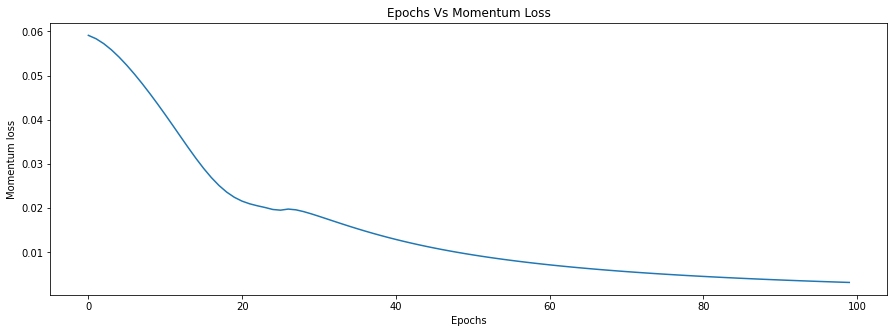

In [ ]:
#Ploting Momentum Loss
plt.figure(figsize=(15,5))
plt.plot(np.arange(epochs), loss_m)
plt.title("Epochs Vs Momentum Loss")
plt.xlabel('Epochs')
plt.ylabel('Momentum loss')
plt.show()

###<font color='blue'>Algorithm with Adam update of weights</font>

In [35]:
#initialize below values
W = np.ones(9)*n
alpha = 0.01
loss_a = []
mu = 0.9
epochs =100
m = v = 0
eps = 1e-8
beta1 = 0.9
beta2 = 0.999

#iterate through epochs
for i in range(epochs):
  #iterate through length of X
  for j in range(len(X)):
    #calculate forward propogation
    df_a = forward_propagation(X[j], y[j], W)
    #calculate backward propogation
    db_a = backward_propagation(X[j],W,df_a)

    #get backward propogation values and convert it into array and store in dw
    dw = np.array(list(db_a.values()))

    #Update m using formula
    m = beta1*m + (1-beta1)*dw
    #Update v using formula
    v = beta2*v + (1-beta2)*(dw**2)
    #Update W using formula
    W += (- alpha * m) / (np.sqrt(v) + eps)

    #calculate forward propogation with updated W
    df_m = forward_propagation(X[j], y[j], W)

  #append loss to list
  loss_a.append(df_m['loss'])

<font color='blue'>Plot between epochs and loss</font>

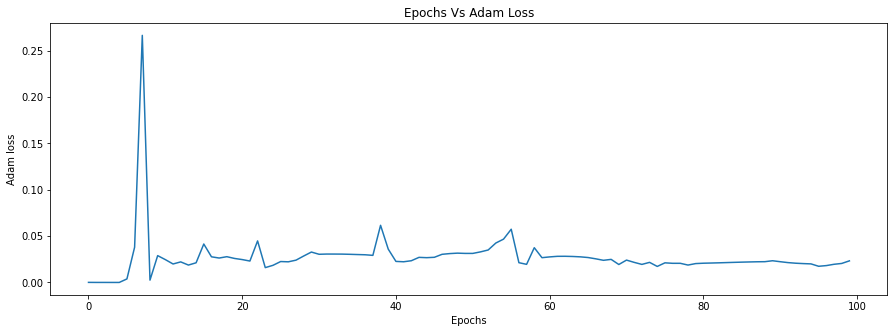

In [ ]:
#Ploting Adam Loss
plt.figure(figsize=(15,5))
plt.plot(np.arange(epochs), loss_a)
plt.title("Epochs Vs Adam Loss")
plt.xlabel('Epochs')
plt.ylabel('Adam loss')
plt.show()

<h1>Observation</h1>

1. We have implemented different types of weight updates as mentioned in the link for task 2
2. It can be seen that, Adam optimizer performs the best, by reducing the loss in minimum number of epochs.
3. Vanilla update does monotonically reduce the loss, but takes higher number of epochs than Adam
4. In Momentum update, the loss seems to reduce gradually.